**Задача №1.**

За вибіркою з неперервного розподілу:
<center> 2.4, 1.0, 0.7, 0.0, 1.1, 1.6, 1.1, -0.4, 0.1, 0.7

записати варіаційний ряд, знайти вибіркову медіану, нижній та верхній квартилі, розмах вибірки. Побудувати графік емпіричної функції розподілу $\hat{F}_n(x)$ та графіки функцій нормальних розподілів із параметрами $\mu = 0.8$, $\sigma^2 = 0.64$ та $\mu = 1$, $\sigma^2 = 0.25$ відповідно. Обчислити значення:

<center> $\sup\limits_{x \in \mathbb{R}}|N_{0.8; 0.64}(x) - \hat{F}_n(x)|$, $\sup\limits_{x \in \mathbb{R}}|N_{1; 0.25}(x) - \hat{F}_n(x)|$

In [1]:
# Вибірка
x <- c(2.4, 1.0, 0.7, 0.0, 1.1, 1.6, 1.1, -0.4, 0.1, 0.7)

In [2]:
# Варіаційний ряд
sort.x <- sort(x)
sort.x

[1] -0.4  0.0  0.1  0.7  0.7  1.0  1.1  1.1  1.6  2.4

In [3]:
# Обсяг вибірки
n <- length(x)
n

[1] 10

In [4]:
# Медіана вибірки -- підрахунок "в лоб"
median.x <- (sort.x[n / 2] + sort.x[n / 2 + 1]) / 2
median.x

[1] 0.85

In [5]:
# Медіана вибірки -- вбудована функція
median(x)

[1] 0.85

In [6]:
# Нижній квартиль вибірки -- підрахунок "в лоб"
lower.q <- sort.x[floor(1 / 4 * n + 1 / 2)]
lower.q

[1] 0.1

In [7]:
# ?quantile -- type 7 -- підрахунок квантилів лінійною інтерполяцією (див. опис функції)

In [8]:
# Нижній квартиль вибірки -- вбудована функція
quantile(x, probs=0.25)

25% 
0.25

In [9]:
# Що робить функція quantile?
#?quantile

In [10]:
# Верхній квартиль вибірки -- підрахунок "в лоб"
upper.q <- sort.x[floor(3 / 4 * n + 1 / 2)]
upper.q

[1] 1.1

In [11]:
# Верхній квартиль вибірки -- вбудована функція
quantile(x, probs=0.75)

75% 
1.1

In [12]:
# Розмах вибірки -- підрахунок "в лоб"
range.x <- sort.x[n] - sort.x[1]
range.x

[1] 2.8

In [13]:
# Розмах вибірки -- вбудована функція
print(range(x))
diff(range(x))

[1] -0.4  2.4


[1] 2.8

In [14]:
# Функція, що повертає реалізацію емп. ф-ії розподілу
# Вхід: x -- вибірка
# Вихід: return.func -- функція, що реалізує підрахунок емп. ф-ії розп.
ecdf.factory <- function(x)
{
    n <- length(x)
    return.func.univar <- function(t)
    {
        mean(x < t)
    }
    return.func <- function(t) sapply(t, return.func.univar)
    return.func
}

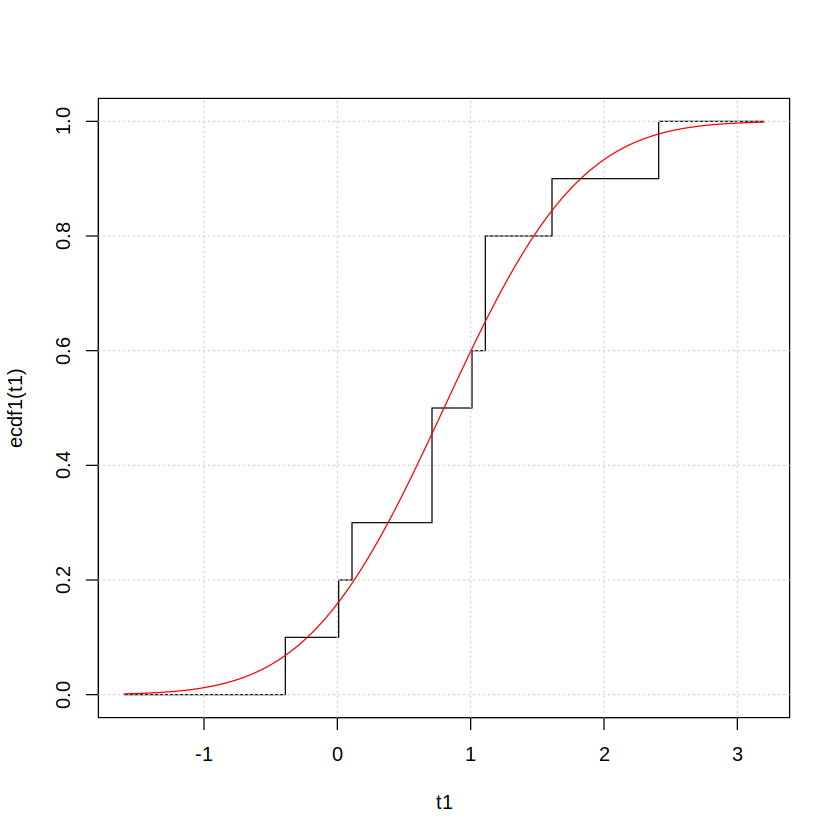

In [15]:
# Побудова графіків: емп. ф-ія розподілу та N(0.8, 0.64)

# Параметри розподілу
mu1 <- 0.8
sigma1 <- sqrt(0.64)

# Носій для побудови графіків
t1 <- seq(mu1 - 3 * sigma1, mu1 + 3 * sigma1, 0.01)

# Долучаємо туди значення з вибірки x
t1 <- sort(c(t1, x))

# Побудова графіків:
# Емпіричної ф-ії розподілу
ecdf1 <- ecdf.factory(x)
plot(t1, ecdf1(t1), type='s'); grid()
# Теор. ф-ії розподілу
lines(t1, pnorm(t1, mean=mu1, sd=sigma1), col="red")

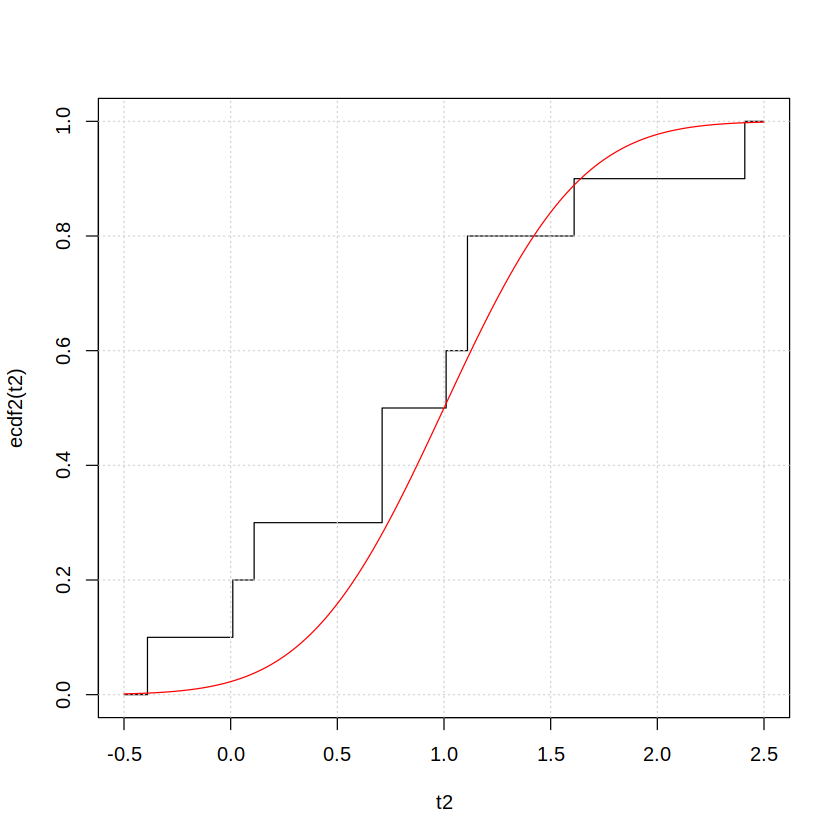

In [16]:
# Побудова графіків: емп. ф-ія розподілу та N(1, 0.25)

# Параметри розподілу
mu2 <- 1
sigma2 <- sqrt(0.25)

# Носій для побудови графіків
t2 <- seq(mu2 - 3 * sigma2, mu2 + 3 * sigma2, 0.01)

# Долучаємо туди значення з вибірки x
t2 <- sort(c(t2, x))

# Побудова графіків:
# Емпіричної ф-ії розподілу
ecdf2 <- ecdf.factory(x)
plot(t2, ecdf2(t2), type='s'); grid()
# Теор. ф-ії розподілу
lines(t2, pnorm(t2, mean=mu2, sd=sigma2), col="red")

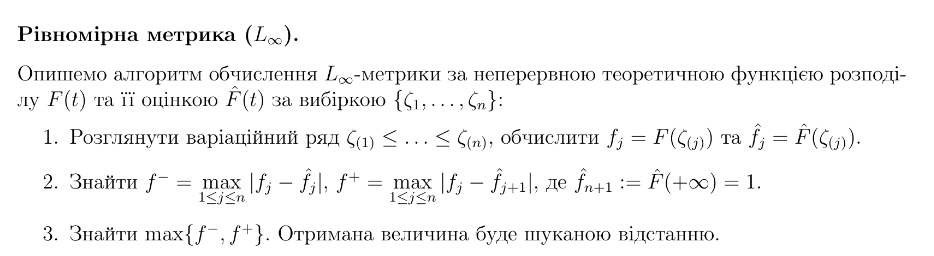

In [17]:
# Підрахунок sup|...| між $\hat{F}_n$ та $N_{\mu,\sigma^2}(x)$
# Вхід:
# sort.x -- варіаційний ряд вибірки x
# F.theor -- теоретична функція розподілу
# F.empirical -- емпірична функція розподілу за вибіркою x
# Вихід:
# max(...) -- значення sup|...|
sup.calc <- function(sort.x, F.theor, F.empirical)
{
    Fj <- F.theor(sort.x)
    Fj.estim <- F.empirical(sort.x)
    F.plus <- max(abs(Fj - Fj.estim))
    F.minus <- max(abs(Fj - c(Fj.estim[-1],1)))
    k.optim <- which.max(abs(Fj - c(Fj.estim[-1],1)))
    list(sup=max(F.plus, F.minus), arg=sort.x[k.optim])
}

In [18]:
# sup-метрика для N(0.8, 0.64)
res1 <- sup.calc(sort.x, function(t) pnorm(t, mean=mu1, sd=sigma1), ecdf1)
res1

$sup
[1] 0.1538302

$arg
[1] 1.1

In [19]:
# sup-метрика для N(1, 0.25) 
res2 <- sup.calc(sort.x, function(t) pnorm(t, mean=mu2, sd=sigma2), ecdf2)
res2

$sup
[1] 0.2640697

$arg
[1] 0.1

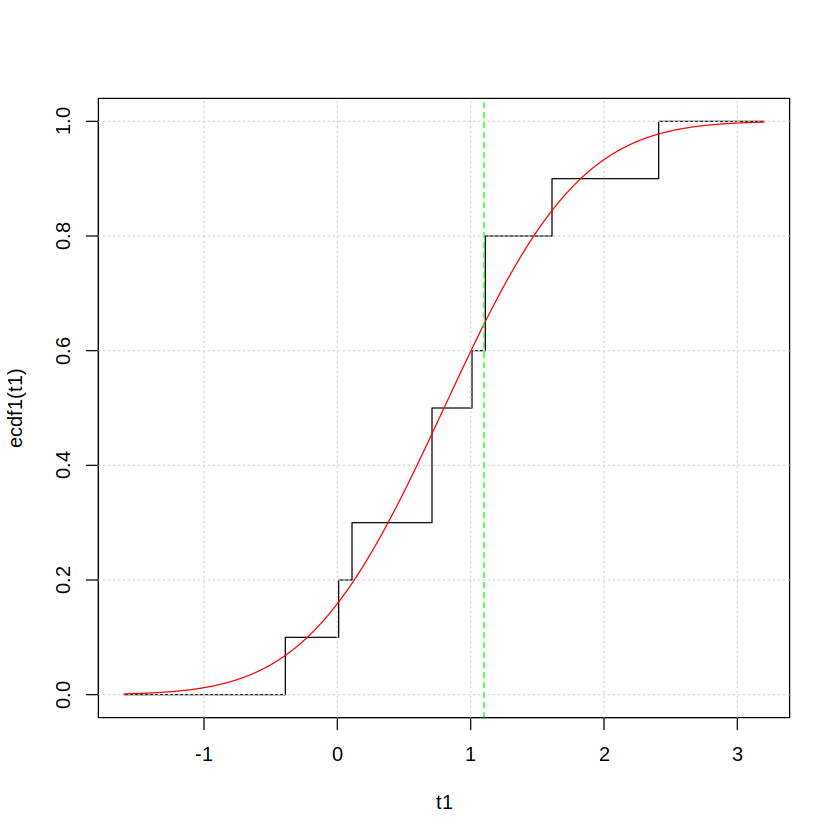

In [20]:
plot(t1, ecdf1(t1), type='s'); grid()
lines(t1, pnorm(t1, mean=mu1, sd=sigma1), col="red")
abline(v=res1$arg, col='green', lty=2)

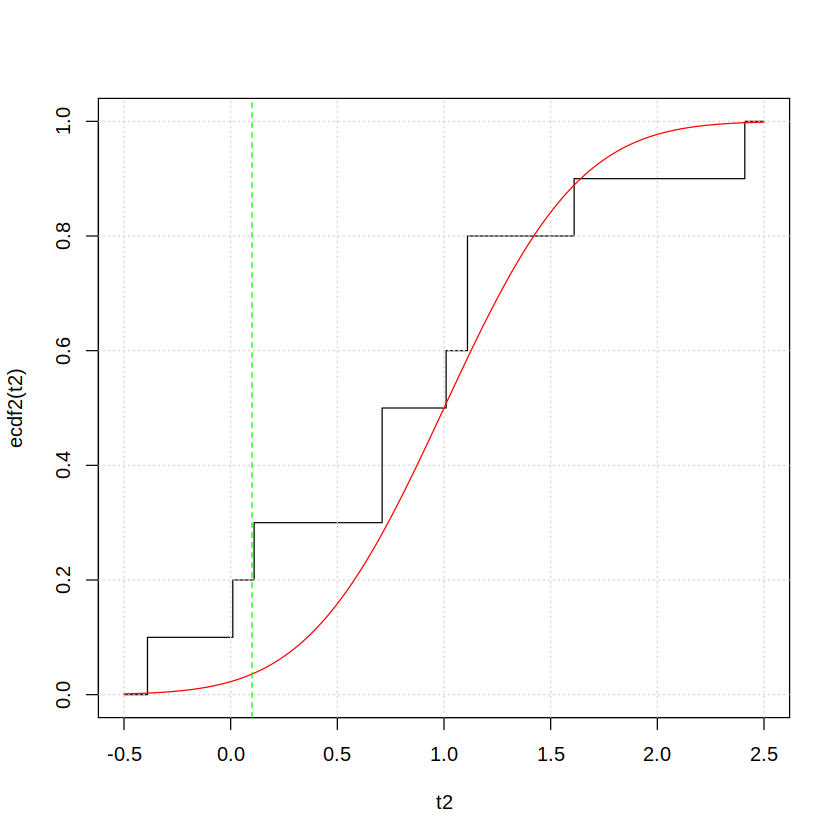

In [21]:
plot(t2, ecdf2(t2), type='s'); grid()
lines(t2, pnorm(t2, mean=mu2, sd=sigma2), col="red")
abline(v=res2$arg, col='green', lty=2)